In [1]:
#Importing important libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#working directory and reading the file
os.chdir(r"your local_directory where Sample - Superstore(1).xlsx exists")
data=pd.read_excel("Sample - Superstore(1).xlsx",sheet_name=0)
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717


In [3]:
#Replacing column names without gaps
data.columns=data.columns.str.replace(' ','')
data.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'Sub-Category', 'ProductName',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
data.shape#shape of the data

(9994, 21)

# EDA-Exploratory data analysis

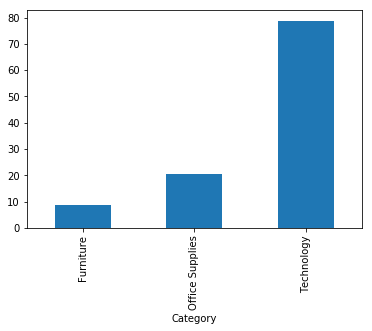

In [5]:
data.groupby('Category')['Profit'].mean().plot.bar()#Category vs profit

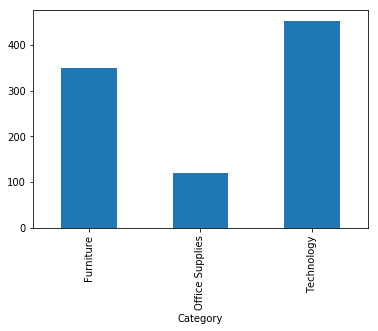

In [6]:
data.groupby('Category')['Sales'].mean().plot.bar() #Category vs sales

We can see that category-technolgy  got more profit than others. lets see which sub category is more profitable

In [7]:
data['Sub-Category'].value_counts() # No of categorical values and counts

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

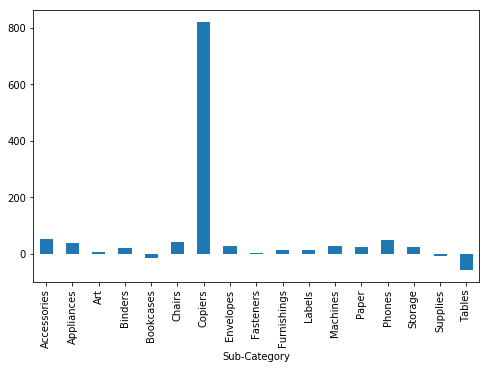

In [8]:
plt.figure(figsize=(8,5))
data.groupby('Sub-Category')['Profit'].mean().plot.bar() #Sub-category vs Profit

copiers showing more profit than other sub-categories lets check into copiers more detailed because it may due to type error or more cost of the product.Tables,bookcases,supplies which are showing loss. compared to others Tables showing huge loss

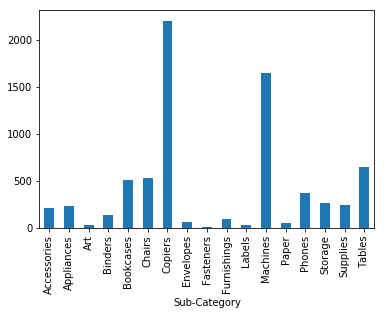

In [9]:
data.groupby('Sub-Category')['Sales'].mean().plot.bar()

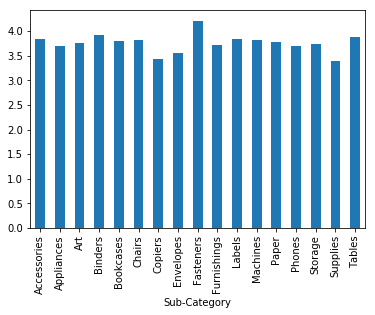

In [10]:
data.groupby('Sub-Category')['Quantity'].mean().plot.bar()

We can see that sales of machines and copiers or printers is more .This may due to the cost of product

In [11]:
data.set_index('Sub-Category',inplace=True)# To Check the copiers sales seeting sub-category as index
data.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,ProductName,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,,,,,,,,,,
Paper,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
Labels,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Avery 508,11.784,3,0.2,4.2717
Storage,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
Binders,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
Art,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [12]:
data.loc['Copiers']

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,ProductName,Sales,Quantity,Discount,Profit
Sub-Category,,,,,,,,,,,,,,,,,,,,
Copiers,7037,CA-2011-124618,2013-05-02,2013-05-04,Second Class,CS-11860,Cari Schnelling,Consumer,United States,Lakeland,Florida,33801,South,TEC-CO-10004202,Technology,Brother DCP1000 Digital 3 in 1 Multifunction M...,479.984,2,0.2,89.9970
Copiers,8800,CA-2011-116666,2013-05-08,2013-05-10,First Class,KT-16480,Kean Thornton,Consumer,United States,Philadelphia,Pennsylvania,19134,East,TEC-CO-10001449,Technology,Hewlett Packard LaserJet 3310 Copier,1799.970,5,0.4,239.9960
Copiers,8553,CA-2011-140473,2013-05-30,2013-06-03,Standard Class,MC-17425,Mark Cousins,Corporate,United States,Chicago,Illinois,60623,Central,TEC-CO-10004202,Technology,Brother DCP1000 Digital 3 in 1 Multifunction M...,719.976,3,0.2,134.9955
Copiers,1550,CA-2011-134278,2013-07-06,2013-07-08,First Class,EP-13915,Emily Phan,Consumer,United States,New York City,New York,10011,East,TEC-CO-10001046,Technology,Canon Imageclass D680 Copier / Fax,559.992,1,0.2,174.9975
Copiers,596,CA-2011-131450,2013-08-08,2013-08-15,Standard Class,LR-16915,Lena Radford,Consumer,United States,San Diego,California,92024,West,TEC-CO-10004115,Technology,Sharp AL-1530CS Digital Copier,1199.976,3,0.2,434.9913
Copiers,5069,CA-2011-124478,2013-08-08,2013-08-12,Standard Class,MA-17560,Matt Abelman,Home Office,United States,Trenton,Michigan,48183,Central,TEC-CO-10001571,Technology,Sharp 1540cs Digital Laser Copier,549.990,1,0.0,274.9950
Copiers,393,US-2011-135972,2013-09-21,2013-09-23,Second Class,JG-15115,Jack Garza,Consumer,United States,Des Moines,Washington,98198,West,TEC-CO-10002313,Technology,Canon PC1080F Personal Copier,1799.970,3,0.0,701.9883
Copiers,5757,CA-2011-163748,2013-10-14,2013-10-18,Standard Class,HG-15025,Hunter Glantz,Consumer,United States,Fort Worth,Texas,76106,Central,TEC-CO-10002095,Technology,Hewlett Packard 610 Color Digital Copier / Pri...,1999.960,5,0.2,624.9875
Copiers,4492,CA-2011-150798,2013-12-01,2013-12-03,Second Class,JK-15730,Joe Kamberova,Consumer,United States,Columbus,Ohio,43229,East,TEC-CO-10001571,Technology,Sharp 1540cs Digital Laser Copier,659.988,2,0.4,109.9980


cost of the copiers or printers  is more compared to other sub-categories and the profit also more so they are influencing the technology

In furniture category Tables,Bookcases showing huge loss compared to others. It is because of discount they given on the product by this we can say that customers are not willing to buy tables,Bookcases{furniture}.

In [13]:
df=data.reset_index()#Resetting index to normal

In [14]:
df.describe()#Describe about data

,RowID,PostalCode,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Text(0, 0.5, 'Sales')

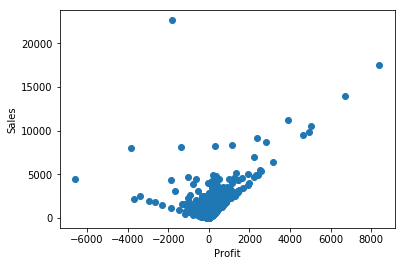

In [15]:
plt.scatter(x=df['Profit'],y=df['Sales'])
plt.xlabel('Profit')
plt.ylabel('Sales')

In [16]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

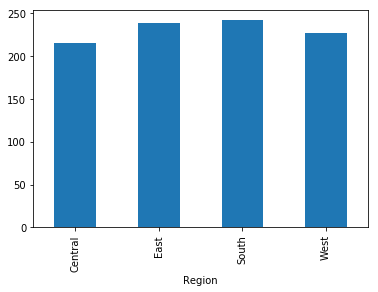

In [17]:
df.groupby('Region')['Sales'].mean().plot.bar() #Region wise Sales

In [18]:
#plt.figure(figsize=(200,150))
#df.groupby('ProductName')['Profit'].mean().plot.bar()

In [19]:
df['Discount'].value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

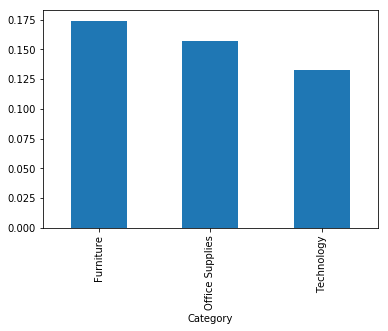

In [20]:
df.groupby('Category')['Discount'].mean().plot.bar() #Category vs discount

Furniture given more discount compared office supplies and technology

In [21]:
df.head(2)

,Sub-Category,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,...,State,PostalCode,Region,ProductID,Category,ProductName,Sales,Quantity,Discount,Profit
0,Paper,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Texas,77095,Central,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,Labels,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Avery 508,11.784,3,0.2,4.2717


By seeing above data we can remove the product Id ,city,Row id,order id,order data,ship,date,ship mode,customer id,customer name,segment,product name.

In [22]:
data['OrderDate']=pd.to_datetime(data['OrderDate']) #Setting to date time format

In [23]:
df['Day']=(df['OrderDate']).dt.day #Separates day from day-month-year
df['Month']=(df['OrderDate']).dt.month#Separates month from Day-month-year
df['Year']=(df['OrderDate']).dt.year# Separates year

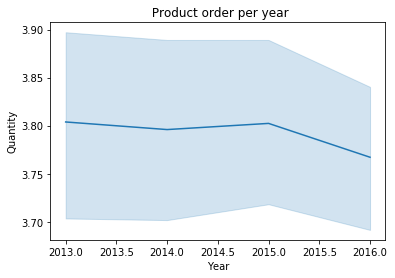

In [24]:
Count  = sns.lineplot(x="Year",  y ="Quantity",data =df).set_title(" Product order per year") # avg products orderes per year


We can see decrese in trend the products ordered in 2016 are less as compaared to 2013

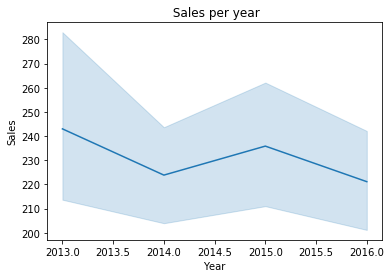

In [25]:
Count  = sns.lineplot(x="Year",  y ="Sales",data =df).set_title(" Sales per year")#Sales per year

Text(0.5, 1.0, 'sales per month')

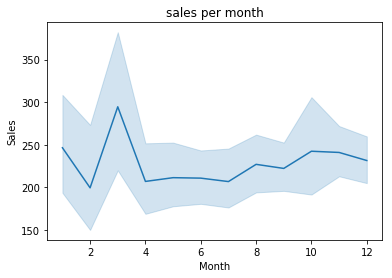

In [26]:
sns.lineplot(x='Month',y='Sales',data=df).set_title('sales per month')#trend of Sales per month

 In 3 month sales are increased which is march

In [27]:
df.head()

,Sub-Category,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,...,ProductID,Category,ProductName,Sales,Quantity,Discount,Profit,Day,Month,Year
0,Paper,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3,1,2013
1,Labels,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-LA-10003223,Office Supplies,Avery 508,11.784,3,0.2,4.2717,4,1,2013
2,Storage,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-ST-10002743,Office Supplies,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,4,1,2013
3,Binders,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,OFF-BI-10004094,Office Supplies,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,4,1,2013
4,Art,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,OFF-AR-10003478,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,5,1,2013


# Data Preprocessing and Model building

In [28]:
df_filtered=df[['Sales','Quantity','Profit','Category']]
df_filtered.head() #getting important columns from data

,Sales,Quantity,Profit,Category
0,16.448,2,5.5512,Office Supplies
1,11.784,3,4.2717,Office Supplies
2,272.736,3,-64.7748,Office Supplies
3,3.540,2,-5.4870,Office Supplies
4,19.536,3,4.8840,Office Supplies


In [29]:
df_filtered.describe()

,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


Given Features doesnot say much so doing feature engineering helps to build better model.

In [30]:
#feature engineering
df_filtered['Sales_per_piece']=df_filtered['Sales']/df_filtered['Quantity'] #Sales per each item

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
df_filtered.isnull().sum() # Null values

Sales              0
Quantity           0
Profit             0
Category           0
Sales_per_piece    0
dtype: int64

Skweness: 12.972752
Kurtsis: 305.311753


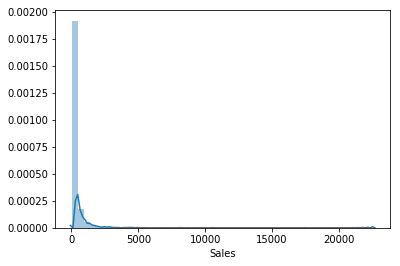

In [32]:
import seaborn as sns
sns.distplot(df_filtered['Sales'])
print('Skweness: %f' % df_filtered['Sales'].skew())
print('Kurtsis: %f' %df_filtered['Sales'].kurt()) # The sales are not distributed normally by seeing the graph 

In [33]:
#df_filtered['Discount']=df_filtered['Discount'].apply(lambda x: 'WithOut Discount' if x==0 else 'With Discount') #Converting to with or without discount

In [34]:
'''conditions=[
    (df_filtered['Profit']>0),
    (df_filtered['Profit']<0),
    (df_filtered['Profit']==0),]
choices=['Profit','Loss','Neutral']
df_filtered['Profit']=np.select(conditions, choices, default='null')'''

"conditions=[\n    (df_filtered['Profit']>0),\n    (df_filtered['Profit']<0),\n    (df_filtered['Profit']==0),]\nchoices=['Profit','Loss','Neutral']\ndf_filtered['Profit']=np.select(conditions, choices, default='null')"

In [35]:
#Categorical features
categorical_features=df_filtered.select_dtypes(include=[np.object])
categorical_features.head(5)

,Category
0,Office Supplies
1,Office Supplies
2,Office Supplies
3,Office Supplies
4,Office Supplies


In [36]:
#Numerical Features
numerical_features=df_filtered.select_dtypes(include=[np.number])
numerical_features.head()

,Sales,Quantity,Profit,Sales_per_piece
0,16.448,2,5.5512,8.224
1,11.784,3,4.2717,3.928
2,272.736,3,-64.7748,90.912
3,3.540,2,-5.4870,1.770
4,19.536,3,4.8840,6.512


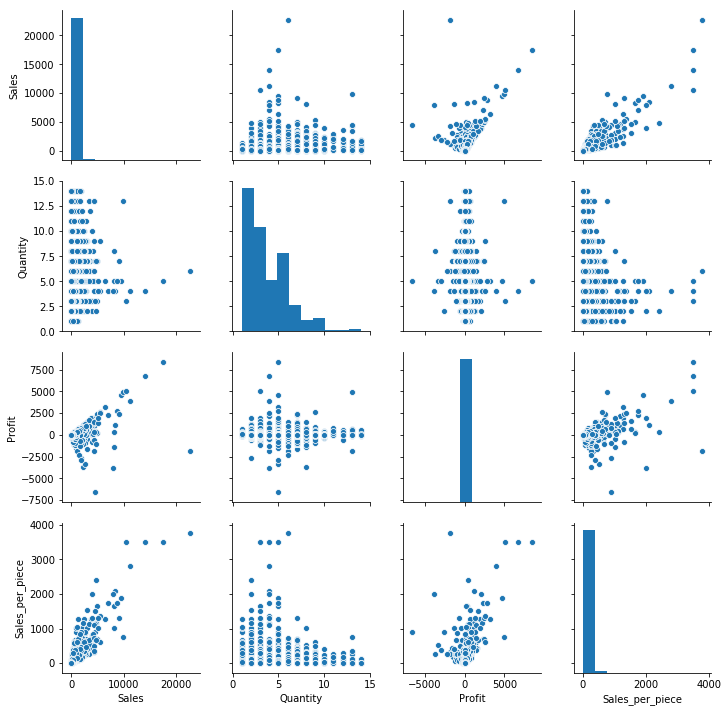

In [37]:
sns.pairplot(numerical_features)

In [38]:
for col in categorical_features:
    print('\n%s column:'%col)
    print(df_filtered[col].value_counts())


Category column:
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64


In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    df_filtered[i]=le.fit_transform(df_filtered[i])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
df_filtered.head()

,Sales,Quantity,Profit,Category,Sales_per_piece
0,16.448,2,5.5512,1,8.224
1,11.784,3,4.2717,1,3.928
2,272.736,3,-64.7748,1,90.912
3,3.540,2,-5.4870,1,1.770
4,19.536,3,4.8840,1,6.512


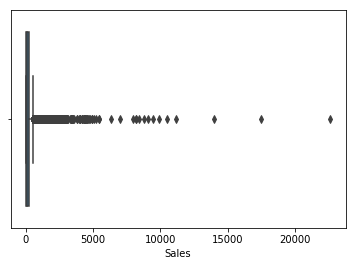

In [41]:
sns.boxplot(df_filtered.Sales)

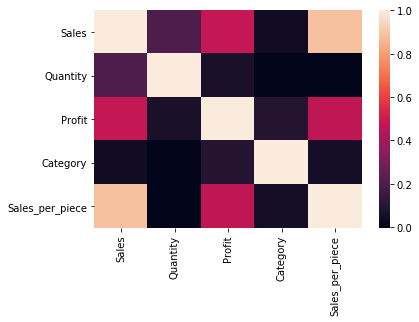

In [42]:
#Corelation between variables
corr=df_filtered.corr()
sns.heatmap(corr)

In [43]:
print(corr['Sales'].sort_values(ascending=False))

Sales              1.000000
Sales_per_piece    0.889376
Profit             0.479064
Quantity           0.200795
Category           0.040077
Name: Sales, dtype: float64


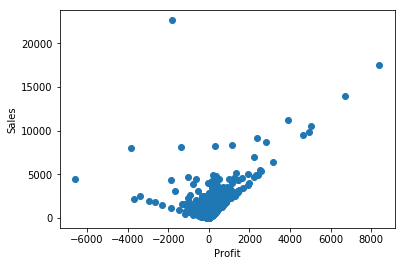

In [44]:
plt.scatter(x=df_filtered['Profit'],y=df_filtered['Sales'])
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

In [45]:
#One hot encoding
data_df=pd.get_dummies(df_filtered,columns=['Quantity','Category'])
data_df.head()

,Sales,Profit,Sales_per_piece,Quantity_1,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14,Category_0,Category_1,Category_2
0,16.448,5.5512,8.224,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,11.784,4.2717,3.928,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,272.736,-64.7748,90.912,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3.540,-5.4870,1.770,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,19.536,4.8840,6.512,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


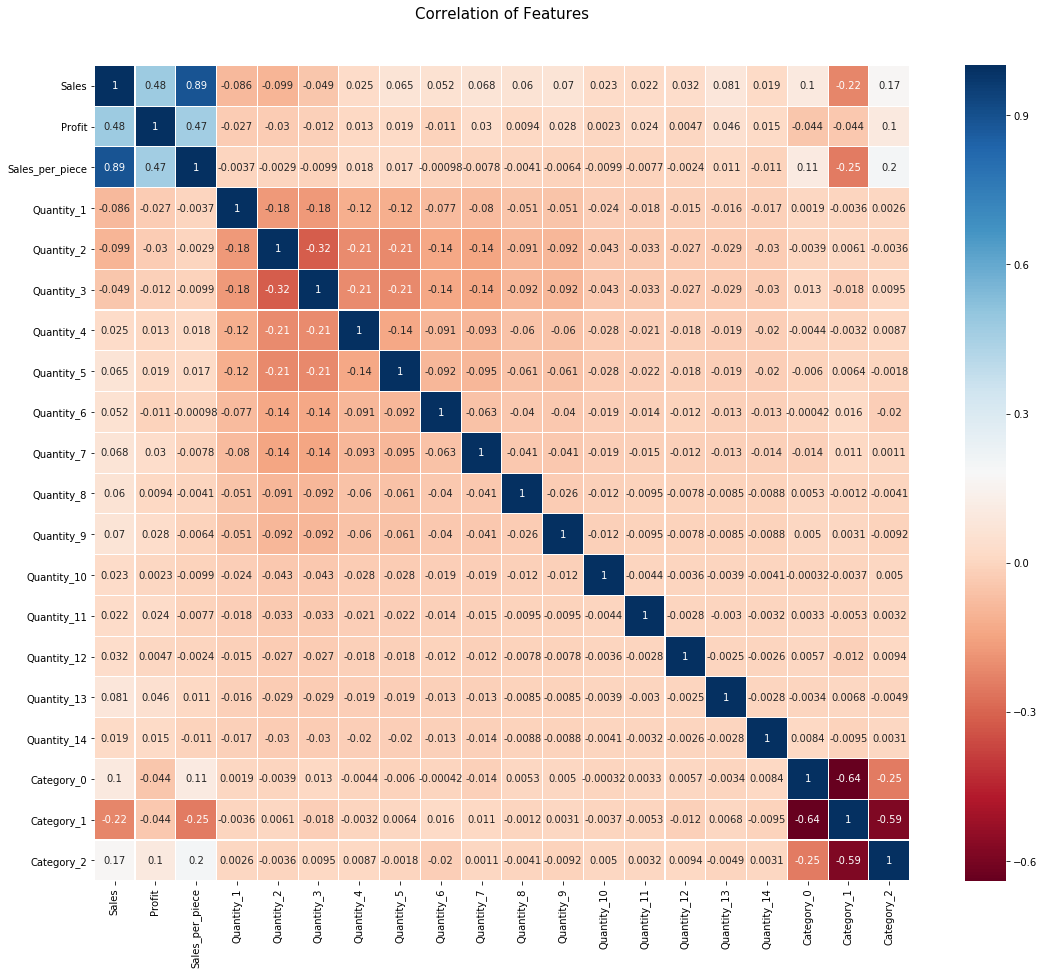

In [46]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [47]:
data_df.describe()

,Sales,Profit,Sales_per_piece,Quantity_1,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14,Category_0,Category_1,Category_2
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,60.919569,0.089954,0.240344,0.241045,0.119172,0.123074,0.057234,0.060636,0.025715,0.025815,0.005703,0.003402,0.002301,0.002702,0.002902,0.212227,0.602962,0.184811
std,623.245101,234.260108,142.927440,0.286130,0.427314,0.427739,0.324006,0.328538,0.232301,0.238674,0.158293,0.158592,0.075309,0.058231,0.047920,0.051909,0.053792,0.408905,0.489309,0.388163
min,0.444000,-6599.978000,0.336000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.280000,1.728750,5.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.490000,8.666500,16.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,209.940000,29.364000,63.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,22638.480000,8399.976000,3773.080000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from scipy import stats
train=data_df[(np.abs(stats.zscore(data_df)) < 4).all(axis=1)]
train.shape

(8643, 20)

In [49]:
train.describe()

,Sales,Profit,Sales_per_piece,Quantity_1,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14,Category_0,Category_1,Category_2
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.0,8643.000000,8643.0,8643.0,8643.0,8643.0,8643.0,8643.0,8643.0,8643.000000,8643.000000,8643.000000
mean,161.639709,19.774106,51.526691,0.103436,0.275946,0.276987,0.136180,0.139419,0.0,0.068032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212542,0.603378,0.184080
std,280.977990,83.255782,80.934797,0.304546,0.447016,0.447536,0.342999,0.346403,0.0,0.251815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409130,0.489224,0.387572
min,0.444000,-786.744000,0.336000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,15.260000,1.634000,5.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,46.360000,7.465500,15.992000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,179.940000,24.476300,60.980000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,2575.944000,899.982000,625.990000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


Text(0, 0.5, 'Sales')

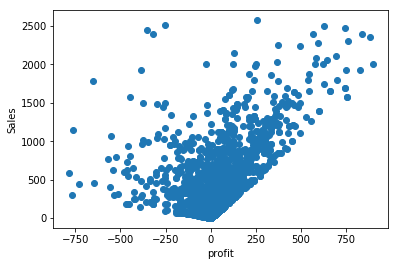

In [50]:
plt.scatter(x=train['Profit'],y=train['Sales'])
plt.xlabel('profit')
plt.ylabel('Sales')

Skweness: 3.416321
Kurtsis: 15.191115


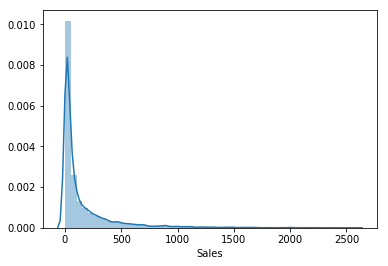

In [51]:
sns.distplot(train['Sales'])
print('Skweness: %f' % train['Sales'].skew())
print('Kurtsis: %f' %train['Sales'].kurt()) # The sales are not distributed normally by seeing the graph 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


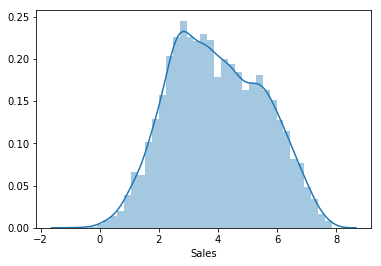

In [52]:

train['Sales']=np.log(train['Sales'])
sns.distplot(train['Sales'])

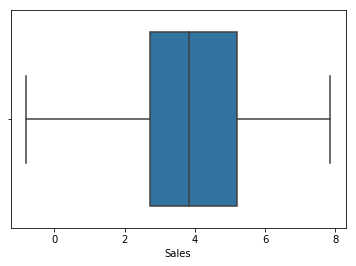

In [53]:
sns.boxplot(train.Sales)

In [54]:
train.dtypes #Dtypes

Sales              float64
Profit             float64
Sales_per_piece    float64
Quantity_1           uint8
Quantity_2           uint8
Quantity_3           uint8
Quantity_4           uint8
Quantity_5           uint8
Quantity_6           uint8
Quantity_7           uint8
Quantity_8           uint8
Quantity_9           uint8
Quantity_10          uint8
Quantity_11          uint8
Quantity_12          uint8
Quantity_13          uint8
Quantity_14          uint8
Category_0           uint8
Category_1           uint8
Category_2           uint8
dtype: object

In [55]:
#Data ready for model buliding
x=train.drop(['Sales'],axis=1)#input data
y=train['Sales']#target variable

In [56]:
print(x.shape)
print(y.shape)

(8643, 19)
(8643,)


In [57]:
#Splitting the data for training and validation 
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,random_state=0)

In [58]:
#Standardizing the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scl=StandardScaler()
scl.fit(X_train)
X_std=scl.transform(X_train)
X_val_std=scl.transform(X_val)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True,n_jobs=5,normalize=True)
model.fit(X_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=True)

In [60]:
print('R-Squared score (training):{:.3f}'.format(model.score(X_std,y_train)))
print('R-Squared score (validation):{:.3f}'.format(model.score(X_val_std,y_val)))

R-Squared score (training):0.707
R-Squared score (validation):0.697


# Ridge Regression

In [61]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=15.0, fit_intercept=True)
lr.fit(X_std,y_train)

Ridge(alpha=15.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
print('R-Squared score Ridge (training):{:.3f}'.format(lr.score(X_std,y_train)))
print('R-Squared score Ridge (validation):{:.3f}'.format(lr.score(X_val_std,y_val)))

R-Squared score Ridge (training):0.707
R-Squared score Ridge (validation):0.698


# RandomForest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=25,max_features=10,n_jobs=10,verbose=0,random_state=50)
rf.fit(X_std,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=10, oob_score=False, random_state=50,
           verbose=0, warm_start=False)

In [64]:
print('R-Squared score RandomForest (training):{:.3f}'.format(rf.score(X_std,y_train)))
print('R-Squared score RandomForest (validation):{:.3f}'.format(rf.score(X_val_std,y_val)))

R-Squared score RandomForest (training):1.000
R-Squared score RandomForest (validation):0.999


In [65]:
print(y_train.head())
print(y_train.dtype)

5124    6.060057
5373    2.457878
1308    2.719979
8768    2.464704
4240    5.492814
Name: Sales, dtype: float64
float64


In [66]:
pred=rf.predict(X_train)
pred2=rf.predict(X_val)
print(pred)

[7.42423905 7.1529567  7.41069976 ... 7.25364243 7.24608327 6.22505217]


In [67]:
def mape(y, y_hat):
    err = np.mean(abs((y-y_hat)/y))
    return(err)

def rmse(y, y_hat):
    err = np.sqrt(np.mean(np.square(y-y_hat)))
    return(err)

In [68]:
train_mape_3 = mape(y_train, y_hat=pred)
val_mape_3 = mape(y_val, y_hat=pred2)

In [69]:
print(train_mape_3)
print(val_mape_3)

1.4835121080766527
1.2610147511929506


In [70]:
train_rmse=rmse(y_train,y_hat=pred)
val_rmse=rmse(y_val,y_hat=pred2)

# RMSE

In [71]:
print('Root mean Squared error(training):',train_rmse)
print('Root mean Squared error(validation):',val_rmse)

Root mean Squared error(training): 3.516672042988535
Root mean Squared error(validation): 3.5028875673852737


# Predictions

In [77]:
prediction=np.exp(pred2)#Conver log to exponential form

In [78]:
prediction

array([1670.10150942,  660.82284165, 1958.24765592, ..., 1958.24765592,
       1958.24765592, 1113.91491863])

In [72]:
print('Model Intercept(linear regression):',model.intercept_)
print('model coefficients(linear regression):',model.coef_)

Model Intercept(linear regression): 3.9371381042248363
model coefficients(linear regression): [-0.05698476  1.07539445 -0.31654092 -0.17192593  0.0194825   0.1100126
  0.19992803  0.          0.22613753  0.          0.          0.
  0.          0.          0.          0.          0.10750719 -0.20457838
  0.14439545]


# Feature Importance

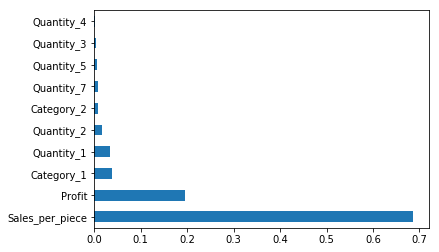

In [73]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [74]:
import statsmodels.api as sm
X=sm.add_constant(x)
s_model=sm.OLS(y,X).fit()
print(s_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2293.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:35:52   Log-Likelihood:                -10918.
No. Observations:                8643   AIC:                         2.186e+04
Df Residuals:                    8633   BIC:                         2.193e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.3688      0.010    2

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# plot learning curves

In [75]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curves(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=None,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Trainig Examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores=learning_curve(estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    plt.grid()
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                     train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean-test_scores_std,
                     test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

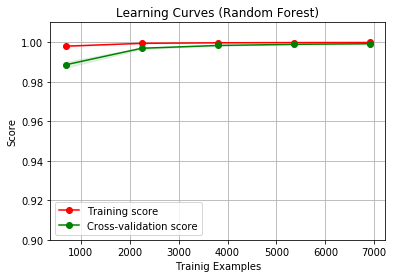

In [76]:
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator=rf
plot_learning_curves(estimator, title, X, y, ylim=(0.9, 1.01), cv=cv, n_jobs=4)